In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tabulate import tabulate # se de pegar el siguiente comando en la terminal antes de ejecutar <pip install tabulate> 

### Descarga de datos

In [44]:
violencia_a = pd.read_csv('datos_estimacion_anual.csv',thousands=r',')

In [45]:
violencia_a

,Fecha,Carpetas
0,2016,101403
1,2017,105816
2,2018,111220
3,2019,127143


### Manipulación de datos 

In [46]:
v = np.array(violencia_m)

In [47]:
x = v[:,0]

In [48]:
y = v[:,1]

In [49]:
v

array([[  2016, 101403],
       [  2017, 105816],
       [  2018, 111220],
       [  2019, 127143]])

### Modelos polinomilaes de grado 1, 2 y 3

In [50]:
coefficients1 = np.polyfit(x,y,1)

In [51]:
coefficients2 = np.polyfit(x,y,2)

In [52]:
coefficients3 = np.polyfit(x,y,3)

### Splines cúbicos 

In [58]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 50
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

In [62]:
x_eval = np.arange(2016, 2020, 1)

In [63]:
y_pol_1 = np.polyval(coefficients1, x_eval)
y_pol_2 = np.polyval(coefficients2, x_eval)
y_pol_3 = np.polyval(coefficients3, x_eval)
y_spl = splines(x_eval)

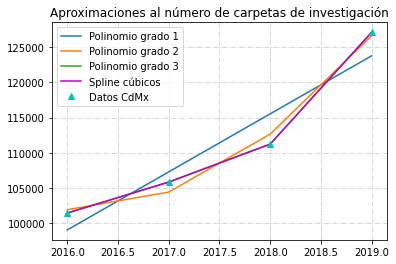

In [65]:
plt.plot(x_eval, y_pol_1,
        x_eval, y_pol_2,
        x_eval, y_pol_3,
        x_eval, y_spl, 'm',
        x_eval, y, 'c^')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Aprox_pobl.png')
plt.show()